<a href="https://colab.research.google.com/github/jongwoonalee/jongwoonalee.github.io/blob/main/Part2_Writing_a_renderer_3D_Software_Renderer_SUBMIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3D Software Renderer**

Importing functions

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from math import atan, sin, cos
import numpy as np

# Part 1: Define the 3D cube centered at the origin with edge length 2

Creating 8 corners of the cube in 3D space
 1. Define a 3D-cube as a numpy array with 8 corners in 3D space centered on [0,0,0] and edge length 2, that is, 2 of the 8 diagonally-opposite corners have the coordinates [1,1,1] and [-1,-1,-1].

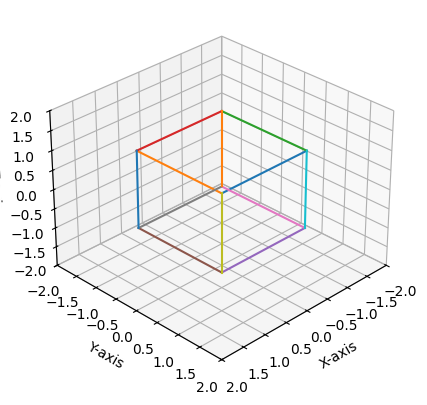

In [2]:
# Creating the corners of the cube in 3D space
# Vertices array - numbers indicate corner positions

vertices = np.array([
    [ 1,  1,  1],  # 0: front top right
    [-1,  1,  1],  # 1: front top left
    [ 1, -1,  1],  # 2: front bottom right
    [-1, -1,  1],  # 3: front bottom left
    [ 1,  1, -1],  # 4: back top right
    [-1,  1, -1],  # 5: back top left
    [ 1, -1, -1],  # 6: back bottom right
    [-1, -1, -1]   # 7: back bottom left
])

# Connecting the edges - each tuple connects two corners
#  the edges of the cube - 0, 1, 2, 3, 4 ..:numbers indicate corner positions
edges = [
    (0, 1), (0, 2), (1, 3), (2, 3),  #  front face edges
    (4, 5), (4, 6), (5, 7), (6, 7),  # back face edges
    (0, 4), (1, 5), (2, 6), (3, 7)   # connecting edges
]

# Function to display the cube in 3D
def show_3d(vertices, edges):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # Using add_subplot instead of gca():  "get current axes"did not work...
    for edge in edges:
        p1 = vertices[edge[0]] #start of edge(p1)
        p2 = vertices[edge[1]] #end point of edge(p2)
        ax.plot([p1[0], p2[0]],
                [p1[1], p2[1]],
                [p1[2], p2[2]]) # # Plot each axis component separately - matplotlib's standard format
  # Set view angle that clearly shows the cube is centered
    ax.view_init(elev=30, azim=45)

  # Set symmetric limits around origin
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)

    # Add grid for better spatial reference
    ax.grid(True)

    # Add axis labels
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()


# Display the initial 3D cube
show_3d(vertices, edges)

#Part 2: Create rotation and translation matrices for camera transformation

1.  let's start by moving our cube in front of the camera. For this, we will first do a transformation according to the extrinsic parameters of the camera (translation and rotation).
Here is a general definition of a rotation matrix around a vector u=[ux,uy,uz] with ||u||=1: (Rodrigues' rotation formula.)
Make a function for creating such a matrix, given a direction and an angle.

In [3]:
def rotation_matrix(u, theta):#u: A vector representing the axis of rotation, theta: The angle of rotation in radians
    """
    Create a rotation matrix for rotation around vector u by angle theta (in radians)
    u should be a unit vector (|u| = 1)
    """
    # Ensure u is a unit vector
    u = np.array(u) # Convert to numpy array for vector operations
    u = u / np.linalg.norm(u) # Normalize the vector - ensure magnitude is 1
    ux, uy, uz = u # Break down vector into components

    # Calculate trig values once
    cos_theta = cos(theta)
    sin_theta = sin(theta)
    one_minus_cos = 1 - cos_theta

    # Build the rotation matrix using Rodrigues' formula
    return np.array([
        [cos_theta + ux*ux*one_minus_cos, ux*uy*one_minus_cos - uz*sin_theta, ux*uz*one_minus_cos + uy*sin_theta],
        [uy*ux*one_minus_cos + uz*sin_theta, cos_theta + uy*uy*one_minus_cos, uy*uz*one_minus_cos - ux*sin_theta],
        [uz*ux*one_minus_cos - uy*sin_theta, uz*uy*one_minus_cos + ux*sin_theta, cos_theta + uz*uz*one_minus_cos]
    ])


2. Next, create a translation matrix using another helper function that you need to code. Use homogenous coordinates. Also remember to augment the rotation matrices accordingly so that they fit the homogenous calculations!!

    1) Here, we rotate first around the x-axis (u=[1,0,0]), then around the y-axis, then around the z-axis, and then we translate.
    
    Create a function get_extrinsic_matrix(position,orientation)that returns the final 4x4 extrinsic matrix based on homogenous coordinates.
    
    2) Next, write a function to_homogenous(points) that turns an array of points into homogenous coordinates [simply add a 1 as another dimension!].
    
    3) Write another function from_homogenous(points) that converts an array of homogenous coordinates into proper 3D or 2D coordinates [by dividing the first 2 or 3 coordinates by the third or fourth element
    
    Note, that these functions should work for both 3D and 2D input!!



In [4]:
def homogeneous_rotation_matrix(u, theta):
    """
    Create a homogeneous 4x4 rotation matrix for rotation around vector u by angle theta
    """
    R = rotation_matrix(u, theta)
    # Convert to homogeneous coordinates (4x4 matrix)
    R_hom = np.eye(4) #Creates a 4×4 identity matrix
    R_hom[:3, :3] = R #Places the 3×3 rotation matrix in the top-left corner
    return R_hom

def translation_matrix(t):
    """
    Create a homogeneous 4x4 translation matrix for translation by vector t
    """
    T = np.eye(4)
    T[:3, 3] = t # Put translation vector in first three rows of last column
    return T

#1) Here, we rotate first around the x-axis (u=[1,0,0]), then around the y-axis, then around the z-axis, and then we translate.
 # Create rotation matrices for each axis
    # Orientation describes how camera is rotated in space
def get_extrinsic_matrix(position, orientation):
    Rx = homogeneous_rotation_matrix([1, 0, 0], orientation[0]) #x-axis rotation
    Ry = homogeneous_rotation_matrix([0, 1, 0], orientation[1]) #y-axis rotation
    Rz = homogeneous_rotation_matrix([0, 0, 1], orientation[2]) #z-axis rotation
    # Translation matrix (negative because we're moving the world, not the camera)
    T = translation_matrix([-p for p in position])

  # Combine transformations: order matters! Apply right to left
    extrinsic = T @ Rz @ Ry @ Rx

    return extrinsic


##2) Next, write a function to_homogenous(points) that turns an array of points into homogenous coordinates [simply add a 1 as another dimension!].
##The function needs to handle both single points and arrays of points correctly.
#In NumPy, these have different shapes
def to_homogenous(points):
    """
    Convert array of points to homogeneous coordinates
    Works for both 2D and 3D points
    """
    # Handle different input shapes
    if len(points.shape) == 1:
        # Single point - just add a 1 at the end
        return np.append(points, 1)
    else:
        # Multiple points - add a column of ones
        ones = np.ones((points.shape[0], 1))
        return np.hstack((points, ones))

def from_homogenous(points):
    """
    Convert array of homogeneous coordinates back to regular coordinates
    Works for both 2D and 3D points
    """
    if len(points.shape) == 1:
        # Single point - divide all but last coordinate by the last one
        return points[:-1] / points[-1]
    else:
        # Multiple points - divide each point by its last coordinate
        return points[:, :-1] / points[:, -1:]


# Part 3: Transform the cube using extrinsic camera parameters
  Using camera_position = [0,0,-2.4], camera_orientation = [0,0.11,0], insert the necessary transformations to transform the cube into camera coordinates using the transformation from get_extrinsic_matrix and show the result using show_3d. You will need to convert back and forth from homogenous coordinates to do this...

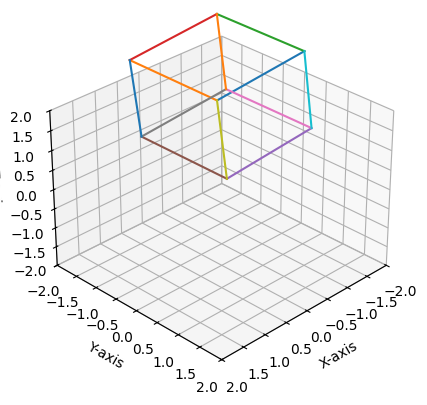

In [5]:
# Camera parameters
camera_position = [0, 0, -2.4]  # Camera positioned along negative z-axis
camera_orientation = [0, 0.11, 0]  # Small rotation around y-axis (~6.3 degrees)

# Get the extrinsic matrix - transforms from world to camera coordinates
extrinsic_matrix = get_extrinsic_matrix(camera_position, camera_orientation)

# Convert vertices to homogeneous coordinates
vertices_homogeneous = to_homogenous(vertices)

# Transform to camera coordinates - matrix multiplication
vertices_camera_homogeneous = np.dot(extrinsic_matrix, vertices_homogeneous.T).T

# Convert back from homogeneous coordinates
# This step is needed since transformation might change the w component
vertices_camera = from_homogenous(vertices_camera_homogeneous)

# Display the cube in camera coordinates
show_3d(vertices_camera, edges)


# Part 4: Create the intrinsic projection matrix
Next, let’s set up the intrinsic projection, including the projection matrix itself. Restrict the intrinsic matrix to only the focal length, such that
𝐾 = [𝑓0𝑠𝑥; 0𝑓𝑠𝑦; 001]

Make a function get_intrinsic_matrix(f,s) that creates the full intrinsic transformation including the projection matrix 3x4 P, so that we get a 3x4 matrix overall.

Again, this uses homogenous coordinates.
Using transform the camera coordinates into projected coordinates.

In order to use the helper-function show_2D from below, you will need to multiply the resulting coordinates by the size of the pixel canvas in pixels. So, we want to show an image of 250x250 pixels, you need to multiply all points by 250.



In [6]:
def get_intrinsic_matrix(f, s):
    """
    Create the intrinsic projection matrix
    f: Focal length of the camera
    s: A tuple containing scaling factors (sx, sy) for the x and y dimensions
    """
    sx, sy = s  # Unpack scaling factors

    # Create the camera calibration matrix K
    # Using focal length and scaling factors, assuming optical center at origin
    K = np.array([
        [f*sx, 0, 0],
        [0, f*sy, 0],
        [0, 0, 1]
    ])

    # Projection matrix P (3x4) - drops homogeneous coordinate
    P = np.zeros((3, 4))
    P[:3, :3] = np.eye(3)  # Identity for first 3x3 block

    # Combine into final intrinsic matrix
    intrinsic = K @ P
    return intrinsic


# Part 5: Project 3D points to 2D using intrinsic matrix:
Insert the final code that projects the cube into an image and plot the result using show_2d. Again, conversion between homogenous coordinates has to be used...

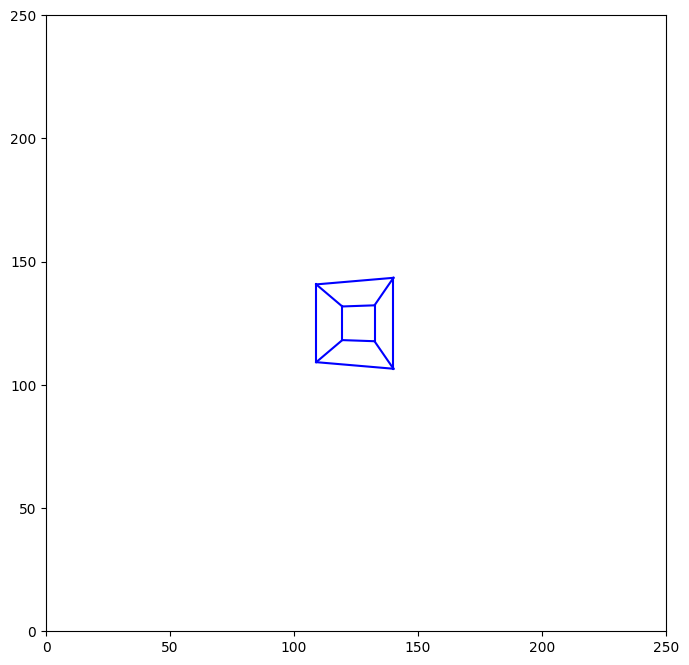

In [9]:
# Camera parameters
f = 0.46  # Focal length
s = (0.48, 0.52)  # Scaling factors - slightly rectangular pixels

# Get the intrinsic matrix
intrinsic_matrix = get_intrinsic_matrix(f, s)

# Project 3D points to 2D
# First make each vertex a column vector, then multiply by intrinsic matrix
vertices_projected_homogeneous = np.dot(intrinsic_matrix, vertices_camera_homogeneous.T).T

# Convert from homogeneous coordinates to get final 2D positions
vertices_projected = from_homogenous(vertices_projected_homogeneous)

# Scale to image size (250x250 pixels)
image_size = (250, 250)
vertices_image = vertices_projected * image_size[0]  # Both dimensions are the same

# Center the image and scale for better visibility
vertices_image = np.zeros_like(vertices_projected)
vertices_image[:, 0] = vertices_projected[:, 0] * 100 + image_size[0]/2  # Scale and center x
vertices_image[:, 1] = -vertices_projected[:, 1] * 100 + image_size[1]/2  # Flip and scale y

# Helper function to display 2D projection (assumed to be defined elsewhere)
# This would show the final rendered cube
def show_2d(vertices, edges, image_size):
    """Show the 2D projection of the cube"""
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, image_size[0])
    ax.set_ylim(0, image_size[1])

    for edge in edges:
        p1 = vertices[edge[0]]
        p2 = vertices[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-')

    plt.show()

# Display the 2D projection
show_2d(vertices_image, edges, image_size)



# Bonus: Rotate the camera around the cube

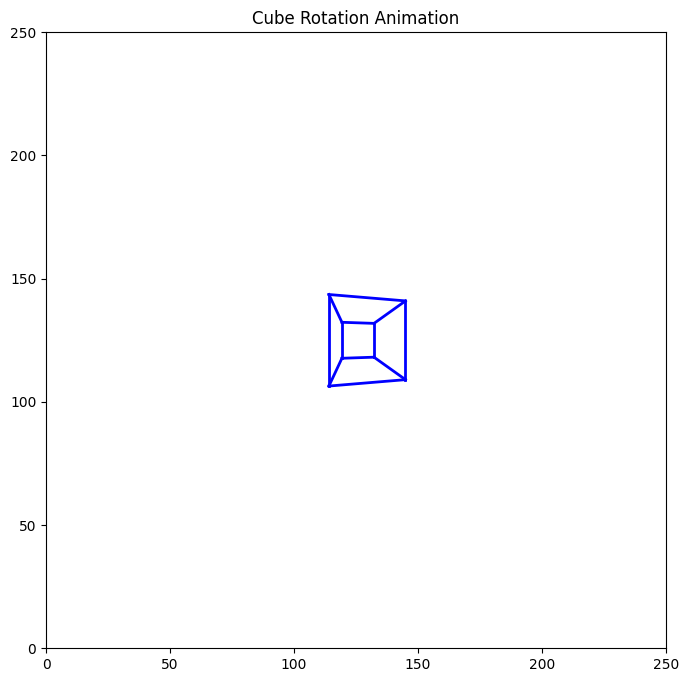

In [8]:
import matplotlib.animation as animation
from IPython.display import HTML

# Setup for animation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, 250)
ax.set_ylim(0, 250)
ax.set_title('Cube Rotation Animation')

# Create empty lines for cube edges
lines = []
for edge in edges:
    line, = ax.plot([], [], 'b-', linewidth=2)  # Blue lines with thickness 2
    lines.append(line)

# Helper function to render the view from a specific camera position
def render_view(cam_pos, cam_orient, focal_length, scale, img_size):
    """Render the cube from a specific camera position and orientation"""
    # Get extrinsic matrix for camera
    ext_matrix = get_extrinsic_matrix(cam_pos, cam_orient)

    # Convert vertices to homogeneous coordinates
    vert_homo = to_homogenous(vertices)

    # Transform to camera coordinates
    vert_cam_homo = np.dot(ext_matrix, vert_homo.T).T

    # Create intrinsic matrix
    intr_matrix = get_intrinsic_matrix(focal_length, scale)

    # Project to 2D
    vert_proj_homo = np.dot(intr_matrix, vert_cam_homo.T).T

    # Convert from homogeneous coordinates
    vert_proj = from_homogenous(vert_proj_homo)

    # Scale and center for display
    vert_image = np.zeros_like(vert_proj)
    vert_image[:, 0] = vert_proj[:, 0] * 100 + img_size[0]/2
    vert_image[:, 1] = -vert_proj[:, 1] * 100 + img_size[1]/2

    return vert_image

def init():
    """Initialize animation - empty lines"""
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    """Animation function - called for each frame"""
    # Calculate rotation angle (full circle in 60 frames)
    angle = i * 2 * np.pi / 60

    # Calculate camera position - circular path
    x = 2.4 * np.sin(angle)
    z = -2.4 * np.cos(angle)
    camera_pos = [x, 0, z]  # Fixed height (y=0)

    # Make camera look at center of cube
    # arctan2 gives us the angle to rotate so camera points at origin
    y_rot = np.arctan2(x, -z)
    camera_orient = [0, y_rot, 0]

    # Render the view from this position
    vertices_2d = render_view(camera_pos, camera_orient, f, s, (250, 250))

    # Update each edge line
    for j, line in enumerate(lines):
        p1 = vertices_2d[edges[j][0]]
        p2 = vertices_2d[edges[j][1]]
        line.set_data([p1[0], p2[0]], [p1[1], p2[1]])

    return lines

# Create the animation
ani = animation.FuncAnimation(
    fig, animate, frames=60,
    init_func=init, blit=True, interval=100
)

# Display in Jupyter Notebook
HTML(ani.to_jshtml())
